<a href="https://colab.research.google.com/github/wilferalexander/Obesity/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity DataSet

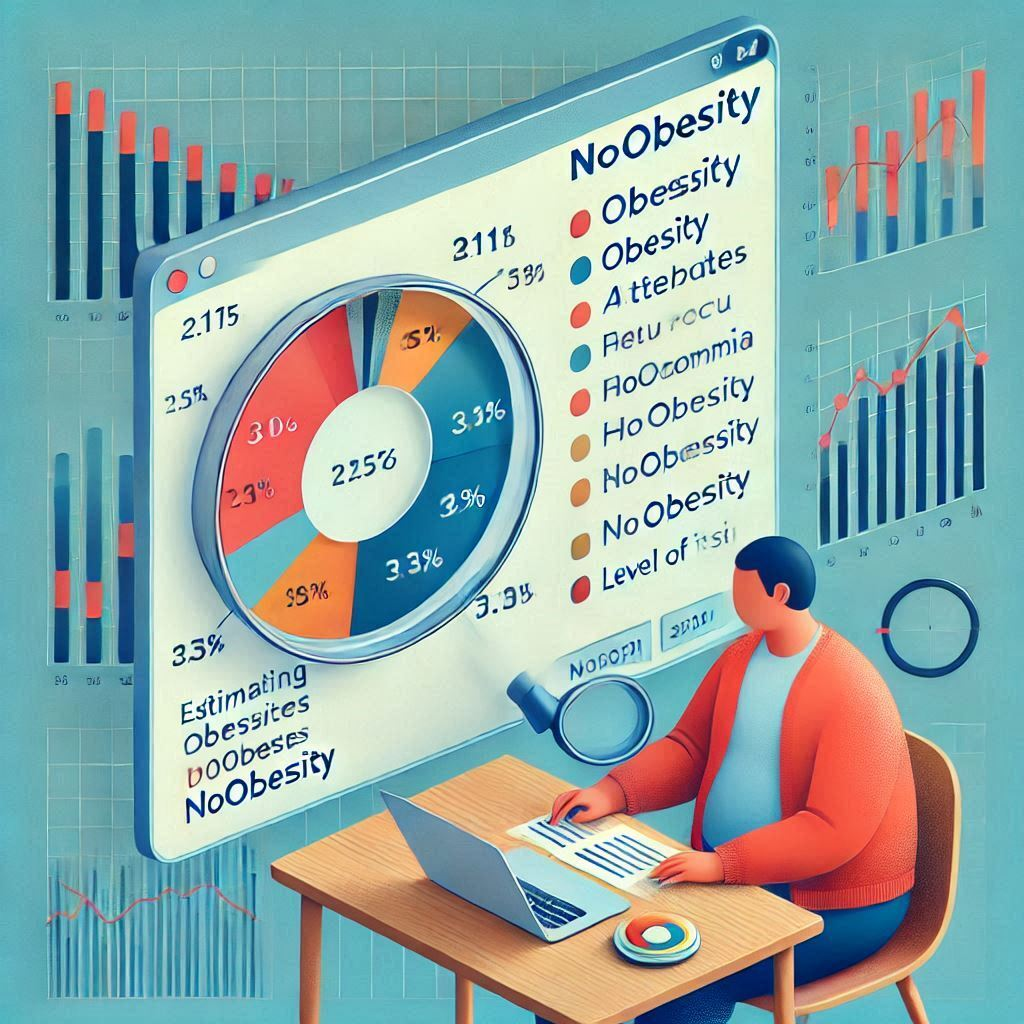

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico,
 Peru and Colombia, based on their eating habits and physical condition.
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level).


Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basados en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NOobesidad (Nivel de Obesidad).

# 1. Configuración del Ambiente

In [271]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 2.2.2
------
Name: matplotlib
Version: 3.8.0


# 2. Obtención, Tratamiento y Análisis Exploratorio (EDA)

In [272]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
from collections import Counter
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]



In [273]:
# URL correcta para el archivo CSV
url_Obesity = 'https://raw.githubusercontent.com/wilferalexander/Obesity/main/ObesityDataSet_raw_and_data_sinthetic.csv'

# Cargar el dataset de obesidad
df_Obesity = pd.read_csv(url_Obesity)

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df_Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# 1. Data Preparation



## **A. How many features does the dataset have? Is there a target variable?**
   ** A. ¿Cuántas características tiene el conjunto de datos?


In [274]:
# A. ¿Cuántas características tiene el conjunto de datos?
num_features = df_Obesity.shape[1]
print("************************************************************")
print(f"El conjunto de datos tiene {num_features} características.")
print("************************************************************")

# ¿Existe una variable objetivo?
# la variable objetivo es 'NObeyesdad'
if 'NObeyesdad' in df_Obesity.columns:
    target_variable = 'NObeyesdad'
    print("************************************************************")
    print(f"La variable objetivo es: {target_variable}")
    print("************************************************************")
else:
    print("No se encontró una variable objetivo llamada 'NObeyesdad' en el conjunto de datos.")

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df_Obesity.head()


************************************************************
El conjunto de datos tiene 17 características.
************************************************************
************************************************************
La variable objetivo es: NObeyesdad
************************************************************


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## **B. How many features are numerical, textual, categorical or Boolean? Is   there any statistica


 B. ¿Cuántas características son numéricas, textuales, categóricas o booleanas?

In [275]:
# B. ¿Cuántas características son numéricas, textuales, categóricas o booleanas?
numerical_features = df_Obesity.select_dtypes(include=['int64', 'float64']).columns
textual_features = df_Obesity.select_dtypes(include=['object']).columns
categorical_features = df_Obesity.select_dtypes(include=['category']).columns
boolean_features = df_Obesity.select_dtypes(include=['bool']).columns

print("************************************************************")
print(f"Número de características numéricas: {len(numerical_features)}")
print("************************************************************")
print(f"Número de características textuales: {len(textual_features)}")
print("************************************************************")
print(f"Número de características categóricas: {len(categorical_features)}")
print("************************************************************")
print(f"Número de características booleanas: {len(boolean_features)}")
print("************************************************************")

# ¿Hay alguna dependencia estadística entre las características?
# Calcular la matriz de correlación para las características numéricas
correlation_matrix = df_Obesity[numerical_features].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación para las características numéricas:")
print(correlation_matrix)

# Para las características categóricas y booleanas, podemos usar pruebas de chi-cuadrado

from scipy.stats import chi2_contingency

# prueba de chi-cuadrado entre dos características categóricas
if len(categorical_features) >= 2:
    contingency_table = pd.crosstab(df_Obesity[categorical_features[0]], df_Obesity[categorical_features[1]])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print("************************************************************")
    print(f"Prueba de chi-cuadrado entre {categorical_features[0]} y {categorical_features[1]}:")
    print("************************************************************")
    print(f"Chi2: {chi2}, p-value: {p}")
    print("************************************************************")
else:
    print("************************************************************")
    print("No hay suficientes características categóricas para realizar la prueba de chi-cuadrado.")
    print("************************************************************")


************************************************************
Número de características numéricas: 8
************************************************************
Número de características textuales: 9
************************************************************
Número de características categóricas: 0
************************************************************
Número de características booleanas: 0
************************************************************
Matriz de correlación para las características numéricas:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   

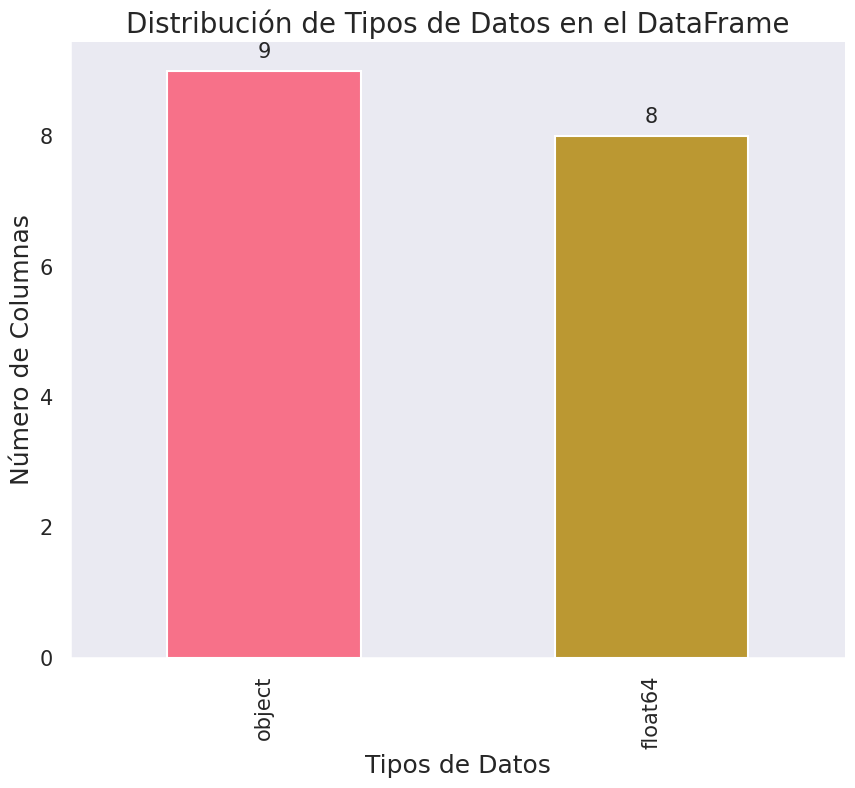

In [276]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_Obesity.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [277]:
#Información de los datos
print("Número de filas: ",df_Obesity.shape[0])
print("Número de Columnas:",df_Obesity.shape[1])
print("Datos Duplicados",df_Obesity.duplicated().sum())
print("Variables Categóricas: ",df_Obesity.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_Obesity.select_dtypes(exclude='object').shape[1])

Número de filas:  2111
Número de Columnas: 17
Datos Duplicados 24
Variables Categóricas:  9
Variables Numéricas:  8


In [278]:
#datos nulos por columna
df_Obesity.isnull().sum().sort_values(ascending=False)

,0
Gender,0
SMOKE,0
MTRANS,0
CALC,0
TUE,0
FAF,0
SCC,0
CH2O,0
CAEC,0
Age,0


Text(0, 0.5, 'Filas')

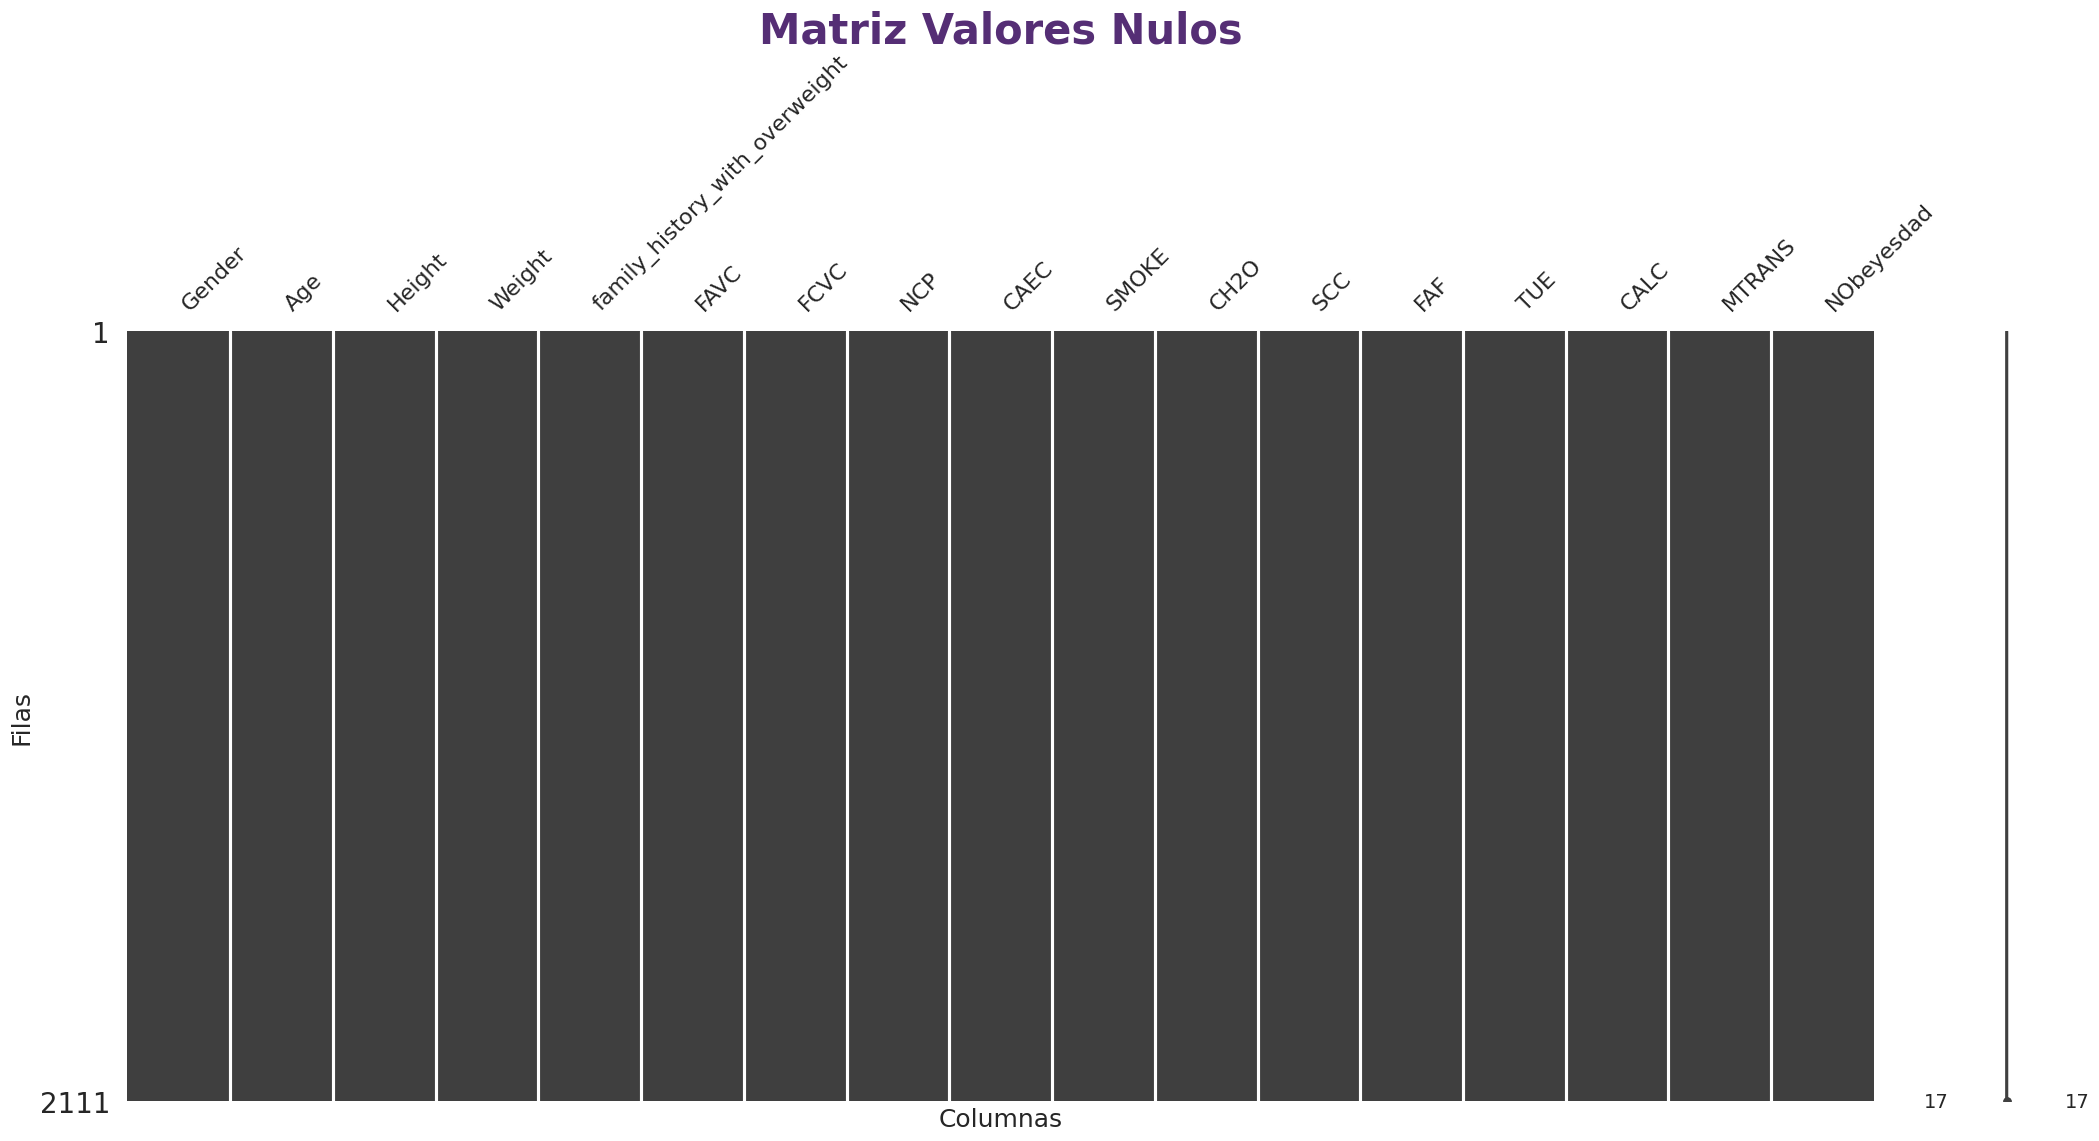

In [279]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_Obesity)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [280]:
#Identificar los valores unicos por columna
df_Obesity.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


## C. Identify the best suited task for the chosen dataset. Is this a supervised or unsupervised data mining task? Is it a) clustering, b) classification or c) regression task

Para identificar la tarea más adecuada para el conjunto de datos de obesidad y determinar si se trata de una tarea de minería de datos supervisada o no supervisada, necesitamos entender el objetivo del análisis y la naturaleza de los datos.

Para identificar la tarea más adecuada para el conjunto de datos de obesidad y determinar si se trata de una tarea de minería de datos supervisada o no supervisada, necesitamos entender el objetivo del análisis y la naturaleza de los datos.

**Análisis del Conjunto de Datos**

*  **Objetivo del Análisis:** El objetivo es estimar los niveles de obesidad en
individuos basados en sus hábitos alimenticios y condición física.
*   **Variable Objetivo:** La variable objetivo es NObeyesdad (Nivel de Obesidad), que es una variable categórica que indica el nivel de obesidad.

**Tipo de Tarea**

Dado que tenemos una variable objetivo categórica (NObeyesdad), este es un problema de clasificación supervisada. En una tarea de clasificación supervisada, el objetivo es predecir la categoría o clase de una variable objetivo basada en las características de entrada.


In [281]:
# Verificar las primeras filas del DataFrame
df_Obesity.head()

# Verificar la variable objetivo
if 'NObeyesdad' in df_Obesity.columns:
    target_variable = 'NObeyesdad'
    print("************************************************************")
    print(f"La variable objetivo es: {target_variable}")
    print("************************************************************")
    print("Este es un problema de clasificación supervisada.")
    print("************************************************************")
else:
    print("************************************************************")
    print("No se encontró una variable objetivo llamada 'NObeyesdad' en el conjunto de datos.")
    print("************************************************************")

# Verificar los valores únicos de la variable objetivo
print("************************************************************")
print(f"Valores únicos de la variable objetivo {target_variable}: {df_Obesity[target_variable].unique()}")
print("************************************************************")

************************************************************
La variable objetivo es: NObeyesdad
************************************************************
Este es un problema de clasificación supervisada.
************************************************************
************************************************************
Valores únicos de la variable objetivo NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
************************************************************


# Data quality and data cleansing

A. Are there missing values in the data? Explain the most common techniques used to deal with
missing values in a dataset. Show how you would perform this analysis in Python.

determinar si hay valores faltantes en el conjunto de datos y explicar las técnicas más comunes para manejarlos, podemos seguir estos pasos en Python.



**Identificar Valores Faltantes:** Verificar si hay valores faltantes en el conjunto de datos.

**Técnicas Comunes para Manejar Valores Faltantes:**

  * **Eliminación**: Eliminar filas o columnas con valores faltantes.
  * **Imputación**: Rellenar los valores faltantes con un valor constante, la media, la mediana o el modo.
  *  **Interpolación**: Estimar los valores faltantes basándose en otros datos.
  *  **Modelos Predictivos**: Usar modelos predictivos para estimar los valores faltantes.


In [282]:
# A. ¿Hay valores faltantes en el conjunto de datos?
missing_values = df_Obesity.isnull().sum()
print("************************************************************")
print("Número de valores faltantes por columna:")
print("************************************************************")
print(missing_values)
print("************************************************************")

# Verificar si hay valores faltantes en el DataFrame
if missing_values.any():
    print("************************************************************")
    print("\nHay valores faltantes en el conjunto de datos.")
    print("************************************************************")
else:
    print("************************************************************")
    print("\nNo hay valores faltantes en el conjunto de datos.")
    print("************************************************************")

# Técnicas comunes para manejar valores faltantes

#  Eliminación de filas con valores faltantes
df_dropped = df_Obesity.dropna()
print("************************************************************")
print("\nNúmero de filas después de eliminar las filas con valores faltantes:", df_dropped.shape[0])
print("************************************************************")

#  Imputación con el modo (solo para columnas categóricas)
for column in df_Obesity.select_dtypes(include=['object']).columns:
    df_Obesity[column].fillna(df_Obesity[column].mode()[0], inplace=True)
print("************************************************************")
print("\nNúmero de valores faltantes después de la imputación con el modo para columnas categóricas:")
print("************************************************************")
print(df_Obesity.isnull().sum())

#  Interpolación (solo para datos numéricos)
df_interpolated = df_Obesity.interpolate()
print("************************************************************")
print("\nNúmero de valores faltantes después de la interpolación:")
print("************************************************************")
print(df_interpolated.isnull().sum())
print("************************************************************")




************************************************************
Número de valores faltantes por columna:
************************************************************
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
************************************************************
************************************************************

No hay valores faltantes en el conjunto de datos.
***************************************

<ipython-input-282-b91474c6e5ae>:29: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-282-b91474c6e5ae>:36: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [283]:
df_Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [284]:
# ver los valores únicos de la columna 'NObeyesdad'
if 'NObeyesdad' in df_Obesity.columns:
    unique_values = df_Obesity['NObeyesdad'].unique()
    print("\nValores únicos en la columna 'NObeyesdad':")
    print(unique_values)
else:
    print("\nLa columna 'NObeyesdad' no se encuentra en el DataFrame.")


Valores únicos en la columna 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [285]:
df_Obesity['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


## B. Are the classes balanced? Explain the most common techniques used to deal with the class imbalance problem.


**Análisis de Equilibrio de Clases**

* **Verificar el Equilibrio de Clases:** Contar el número de instancias en cada clase de la variable objetivo (NObeyesdad).
* **Técnicas Comunes para Manejar el Desequilibrio de Clases:**

* Sobremuestreo (Oersampling): Aumentar el número de instancias en la clase minoritaria.
* Submuestreo (Undersampling): Reducir el número de instancias en la clase mayoritaria.
*        Generación de Datos Sintéticos (SMOTE): Generar datos sintéticos para la clase minoritaria.
*        Uso de Algoritmos Específicos: Utilizar algoritmos que manejen el desequilibrio de clases, como los modelos de árboles de decisión equilibrados.
*       Ajuste de Clases: Ajustar las clases en el modelo para dar más peso a la clase minoritaria.


In [286]:
# Verificar las columnas del DataFrame
print("************************************************************")
print("Columnas del DataFrame:")
print("************************************************************")
print(df_Obesity.columns)
print("************************************************************")

# Verificar los valores únicos en la columna 'NObeyesdad'
if 'NObeyesdad' in df_Obesity.columns:
    unique_values = df_Obesity['NObeyesdad'].unique()
    print("************************************************************")
    print("\nValores únicos en la columna 'NObeyesdad':")
    print("************************************************************")
    print(unique_values)
    print("************************************************************")
else:
    print("************************************************************")
    print("\nLa columna 'NObeyesdad' no se encuentra en el DataFrame.")
    print("************************************************************")


************************************************************
Columnas del DataFrame:
************************************************************
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
************************************************************
************************************************************

Valores únicos en la columna 'NObeyesdad':
************************************************************
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
************************************************************


In [287]:
# Convertir los valores categóricos a numéricos usando LabelEncoder
label_encoder = LabelEncoder()
df_Obesity['NObeyesdad_encoded'] = label_encoder.fit_transform(df_Obesity['NObeyesdad'])

In [288]:
# Verificar los valores únicos en la columna codificada
unique_encoded_values = df_Obesity['NObeyesdad_encoded'].unique()
print("************************************************************")
print("\nValores únicos en la columna 'NObeyesdad_encoded':")
print("************************************************************")
print(unique_encoded_values)

************************************************************

Valores únicos en la columna 'NObeyesdad_encoded':
************************************************************
[1 5 6 2 0 3 4]


In [289]:
# Mapeo de valores originales a valores codificados
value_mapping = dict(zip(unique_values, unique_encoded_values))
print("************************************************************")
print("\nMapeo de valores originales a valores codificados:")
print("************************************************************")
print(value_mapping)
print("************************************************************")

************************************************************

Mapeo de valores originales a valores codificados:
************************************************************
{'Normal_Weight': 1, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6, 'Obesity_Type_I': 2, 'Insufficient_Weight': 0, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4}
************************************************************


In [290]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas
categorical_features = df_Obesity.select_dtypes(include=['object']).columns

# Codificar columnas categóricas usando LabelEncoder
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df_Obesity[column] = le.fit_transform(df_Obesity[column])
    label_encoders[column] = le

# Verificar las columnas del DataFrame después de la codificación
print("************************************************************")
print("Columnas del DataFrame después de la codificación:")
print("************************************************************")
print(df_Obesity.columns)
print("************************************************************")


************************************************************
Columnas del DataFrame después de la codificación:
************************************************************
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'NObeyesdad_encoded'],
      dtype='object')
************************************************************


In [255]:
df_Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,6


In [256]:
# B. ¿Las clases están equilibradas?
target_variable = 'NObeyesdad_encoded'
class_distribution = df_Obesity[target_variable].value_counts()
print("************************************************************")
print("Distribución de clases:")
print("************************************************************")
print(class_distribution)
print("************************************************************")

# Verificar si las clases están equilibradas
if len(class_distribution) > 1:
    majority_class_count = class_distribution.max()
    minority_class_count = class_distribution.min()
    if majority_class_count / minority_class_count > 1.5:
        print("************************************************************")
        print("\nLas clases no están equilibradas.")
        print("************************************************************")
    else:
        print("************************************************************")
        print("\nLas clases están relativamente equilibradas.")
        print("************************************************************")
else:
    print("************************************************************")
    print("\nSolo hay una clase en el conjunto de datos.")
    print("************************************************************")

# Técnicas comunes para manejar el desequilibrio de clases

# 1. Sobremuestreo (Oversampling)
def oversample(df, target_variable):
    majority_class = df[target_variable].value_counts().idxmax()
    minority_class = df[target_variable].value_counts().idxmin()
    minority_class_samples = df[df[target_variable] == minority_class]
    majority_class_samples = df[df[target_variable] == majority_class]

    # Sobremuestreo de la clase minoritaria
    minority_class_upsampled = resample(minority_class_samples, replace=True, n_samples=len(majority_class_samples), random_state=42)
    df_oversampled = pd.concat([majority_class_samples, minority_class_upsampled])

    return df_oversampled

df_oversampled = oversample(df_Obesity, target_variable)
print("************************************************************")
print("\nDistribución de clases después del sobremuestreo:")
print("************************************************************")
print(df_oversampled[target_variable].value_counts())
print("************************************************************")

# 2. Submuestreo (Undersampling)
def undersample(df, target_variable):
    majority_class = df[target_variable].value_counts().idxmax()
    minority_class = df[target_variable].value_counts().idxmin()
    minority_class_samples = df[df[target_variable] == minority_class]
    majority_class_samples = df[df[target_variable] == majority_class]

    # Submuestreo de la clase mayoritaria
    majority_class_downsampled = resample(majority_class_samples, replace=False, n_samples=len(minority_class_samples), random_state=42)
    df_undersampled = pd.concat([majority_class_downsampled, minority_class_samples])

    return df_undersampled

df_undersampled = undersample(df_Obesity, target_variable)
print("************************************************************")
print("\nDistribución de clases después del submuestreo:")
print("************************************************************")
print(df_undersampled[target_variable].value_counts())
print("************************************************************")





************************************************************
Distribución de clases:
************************************************************
NObeyesdad_encoded
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64
************************************************************
************************************************************

Las clases están relativamente equilibradas.
************************************************************
************************************************************

Distribución de clases después del sobremuestreo:
************************************************************
NObeyesdad_encoded
2    351
0    351
Name: count, dtype: int64
************************************************************
************************************************************

Distribución de clases después del submuestreo:
************************************************************
NObeyesdad_encoded
2    272
0    272
Name: count,

## C. Are there outliers in the dataset? Show how you would perform the analysis in Pytho

Para identificar outliers (valores atípicos) en un dataset, podemos utilizar varias técnicas estadísticas y gráficas. Algunas de las técnicas más comunes incluyen:

* Box Plots (Diagramas de Caja): Visualizan la distribución de los datos y muestran los outliers.
* Z-Score: Identifica outliers basándose en la desviación estándar.
*  IQR (Interquartile Range): Identifica outliers basándose en el rango intercuartílico.





### 1. Box Plots



In [291]:
import plotly.express as px

# Identificar y codificar columnas categóricas
categorical_features = df_Obesity.select_dtypes(include=['object']).columns
for column in categorical_features:
    df_Obesity[column] = df_Obesity[column].astype('category').cat.codes

# Crear box plots para las características numéricas
for column in df_Obesity.select_dtypes(include=['float64', 'int64']).columns:
    fig = px.box(df_Obesity, y=column, title=f'Box plot de {column}')
    fig.show()


Interpretación:

* Diagrama de Caja:
 El diagrama de caja muestra la distribución de los datos para cada característica. La caja representa el rango intercuartílico (IQR), que contiene el 50% central de los datos. La línea dentro de la caja representa la mediana.

* Bigotes: Los bigotes se extienden desde la caja hasta los valores más extremos que no son considerados outliers.

* Outliers: Los puntos fuera de los bigotes son considerados outliers. Estos puntos son valores atípicos que se desvían significativamente del resto de los datos.

la variable mas significativa es la de la edad ya que vemos un comportamiento mas alla de Q3  entre mas edad mas tendencia a la obecidad



### 2. Z-Score



In [292]:
from scipy import stats

# Calcular el Z-Score para cada característica numérica
z_scores = np.abs(stats.zscore(df_Obesity.select_dtypes(include=['float64', 'int64'])))

# Identificar outliers basados en un umbral de Z-Score (por ejemplo, 3)
threshold = 3
outliers = (z_scores > threshold)

# Mostrar el número de outliers por característica
print("************************************************************")
print("Número de outliers por característica basado en Z-Score:")
print("************************************************************")
print(outliers.sum())
print("************************************************************")


************************************************************
Número de outliers por característica basado en Z-Score:
************************************************************
Gender                             0
Age                               24
Height                             0
Weight                             1
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              53
SMOKE                             44
CH2O                               0
SCC                               96
FAF                                0
TUE                                0
CALC                               1
MTRANS                             0
NObeyesdad                         0
NObeyesdad_encoded                 0
dtype: int64
************************************************************


**Age (24 outliers):**

* Hay 24 outliers en la característica Age. Esto indica que hay 24 valores de edad que se desvían significativamente de la media en más de 3 desviaciones estándar. Estos podrían ser errores de entrada de datos (por ejemplo, edades extremadamente altas o bajas) o valores legítimos pero extremos.

**Weight (1 outlier):**

* Hay 1 outlier en la característica Weight. Esto indica que hay un valor de peso que se desvía significativamente de la media. Este podría ser un error de entrada de datos o un valor legítimo pero extremo.


**CAEC (53 outliers):**

* Hay 53 outliers en la característica CAEC. Esto indica que hay 53 valores que se desvían significativamente de la media. Estos podrían ser errores de entrada de datos o valores legítimos pero extremos.


**SMOKE (44 outliers):**

* Hay 44 outliers en la característica SMOKE. Esto indica que hay 44 valores que se desvían significativamente de la media. Estos podrían ser errores de entrada de datos o valores legítimos pero extremos.



**SCC (96 outliers):**

* Hay 96 outliers en la característica SCC. Esto indica que hay 96 valores que se desvían significativamente de la media. Estos podrían ser errores de entrada de datos o valores legítimos pero extremos.

**CALC (1 outlier):**

* Hay 1 outlier en la característica CALC. Esto indica que hay un valor que se desvía significativamente de la media. Este podría ser un error de entrada de datos o un valor legítimo pero extremo.


Acciones a Tomar
* Revisar los Outliers:
        Investiga los outliers en las características Age, Weight, CAEC, SMOKE, SCC y CALC para entender si son errores de datos, valores extremos legítimos o si indican algún problema en la recolección de datos.

* Tratar los Outliers:
        Eliminarlos: Si los outliers son errores de datos, considera eliminarlos.
        Transformarlos: Usar técnicas como la normalización o la estandarización.
        Imputarlos: Rellenar los valores atípicos con valores más típicos.

* Modelar con Cuidado:
        Si decides mantener los outliers, asegúrate de que tu modelo de aprendizaje automático pueda manejarlos adecuadamente. Algunos modelos son más robustos a los outliers que otros.

Conclusión

Interpretar los resultados del número de outliers por característica basado en el Z-Score te permite entender mejor tu dataset y tomar decisiones informadas sobre cómo manejarlos. Esto es crucial para mejorar la calidad de tus datos y, en última instancia, la precisión de tus modelos de aprendizaje automático.

In [293]:
# Creamos un DataFrame para visualizar los outliers
outliers_df = df_Obesity[['Age', 'Weight', 'CAEC', 'SMOKE', 'SCC', 'CALC']].melt()
outliers_df['outlier'] = outliers.melt()['value']
outliers_df = outliers_df[outliers_df['outlier']]

# Gráfico de outliers
fig = px.scatter(outliers_df, x='variable', y='value', color='outlier', title='Outliers detectados por Z-Score')
fig.show()


In [294]:
# Investigar los outliers en cada característica
for column in ['Age', 'Weight', 'CAEC', 'SMOKE', 'SCC', 'CALC']:
    outliers_values = df_Obesity[outliers[column]][column]
    print("************************************************************")
    print(f"\nOutliers en la característica {column}:")
    print("************************************************************")
    print(outliers_values)
    print("************************************************************")

    # Revisar los valores de los outliers
    if not outliers_values.empty:
        print("************************************************************")
        print(f"Valores de los outliers en {column}:")
        print("************************************************************")
        print(outliers_values)
        print("************************************************************")


************************************************************

Outliers en la característica Age:
************************************************************
21      52.000000
92      55.000000
133     61.000000
137     44.000000
161     55.000000
169     45.000000
232     51.000000
252     56.000000
492     45.000000
1013    55.246250
1034    50.832559
1063    45.000000
1088    55.137881
1101    46.491859
1158    55.022494
1179    47.706100
1208    45.821267
1215    43.604901
1267    43.510672
1286    47.283374
1305    43.591999
1386    43.719395
1387    43.376340
1490    43.726081
Name: Age, dtype: float64
************************************************************
************************************************************
Valores de los outliers en Age:
************************************************************
21      52.000000
92      55.000000
133     61.000000
137     44.000000
161     55.000000
169     45.000000
232     51.000000
252     56.000000
492     45.000000
1013   

In [295]:
# Definir rangos aceptables para cada característica
ranges = {
    'Age': (18, 80),  # Supongamos que las edades razonables están entre 18 y 80 años
    'Weight': (40, 200),  # Supongamos que los pesos razonables están entre 40 y 200 kg
    'CAEC': (0, 100),  # Supongamos que los valores razonables de CAEC están entre 0 y 100
    'SMOKE': (0, 100),  # Supongamos que los valores razonables de SMOKE están entre 0 y 100
    'SCC': (0, 100),  # Supongamos que los valores razonables de SCC están entre 0 y 100
    'CALC': (0, 100)  # Supongamos que los valores razonables de CALC están entre 0 y 100
}


In [262]:
# Verificar si los outliers están dentro de los rangos aceptables
for column in ['Age', 'Weight', 'CAEC', 'SMOKE', 'SCC', 'CALC']:
    outliers_values = df_Obesity[outliers[column]][column]
    print("************************************************************")
    print(f"\nOutliers en la característica {column}:")
    print("************************************************************")
    print(outliers_values)
    print("************************************************************")

    # Revisar los valores de los outliers
    if not outliers_values.empty:
        print("************************************************************")
        print(f"Valores de los outliers en {column}:")
        print("************************************************************")
        print(outliers_values)
        print("************************************************************")

        # Verificar si los outliers están dentro del rango aceptable
        min_range, max_range = ranges[column]
        within_range = outliers_values.between(min_range, max_range)
        out_of_range = outliers_values[~within_range]

        print("************************************************************")
        print(f"Valores de outliers dentro del rango aceptable en {column}:")
        print("************************************************************")
        print(outliers_values[within_range])
        print("************************************************************")

        print("************************************************************")
        print(f"Valores de outliers fuera del rango aceptable en {column}:")
        print("************************************************************")
        print(out_of_range)
        print("************************************************************")


************************************************************

Outliers en la característica Age:
************************************************************
21      52.000000
92      55.000000
133     61.000000
137     44.000000
161     55.000000
169     45.000000
232     51.000000
252     56.000000
492     45.000000
1013    55.246250
1034    50.832559
1063    45.000000
1088    55.137881
1101    46.491859
1158    55.022494
1179    47.706100
1208    45.821267
1215    43.604901
1267    43.510672
1286    47.283374
1305    43.591999
1386    43.719395
1387    43.376340
1490    43.726081
Name: Age, dtype: float64
************************************************************
************************************************************
Valores de los outliers en Age:
************************************************************
21      52.000000
92      55.000000
133     61.000000
137     44.000000
161     55.000000
169     45.000000
232     51.000000
252     56.000000
492     45.000000
1013   

### 3. IQR (Interquartile Range)



In [296]:
# Calcular el IQR para cada característica numérica
Q1 = df_Obesity.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df_Obesity.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers basados en el IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_Obesity.select_dtypes(include=['float64', 'int64']) < lower_bound) | (df_Obesity.select_dtypes(include=['float64', 'int64']) > upper_bound))

# Mostrar el número de outliers por característica
print("Número de outliers por característica basado en IQR:")
print(outliers_iqr.sum())


Número de outliers por característica basado en IQR:
Gender                              0
Age                               168
Height                              1
Weight                              1
family_history_with_overweight    385
FAVC                              245
FCVC                                0
NCP                               579
CAEC                              346
SMOKE                              44
CH2O                                0
SCC                                96
FAF                                 0
TUE                                 0
CALC                                1
MTRANS                            531
NObeyesdad                          0
NObeyesdad_encoded                  0
dtype: int64


In [297]:
from scipy import stats

# Calcular el Z-Score para cada característica numérica
z_scores = np.abs(stats.zscore(df_Obesity.select_dtypes(include=['float64', 'int64'])))

# Identificar outliers basados en un umbral de Z-Score (por ejemplo, 3)
threshold = 3
outliers_z = (z_scores > threshold)

# Crear un DataFrame para visualizar los outliers de Z-Score
df_z_outliers = df_Obesity.select_dtypes(include=['float64', 'int64']).melt()
df_z_outliers['outlier'] = outliers_z.melt()['value']
df_z_outliers = df_z_outliers[df_z_outliers['outlier']]

# Gráfico de outliers de Z-Score
fig_z = px.scatter(df_z_outliers, x='variable', y='value', color='outlier', title='Outliers detectados por Z-Score')
fig_z.show()


In [298]:
# Calcular el IQR para cada característica numérica
Q1 = df_Obesity.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df_Obesity.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers basados en el IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_Obesity.select_dtypes(include=['float64', 'int64']) < lower_bound) | (df_Obesity.select_dtypes(include=['float64', 'int64']) > upper_bound))

# Crear un DataFrame para visualizar los outliers de IQR
df_iqr_outliers = df_Obesity.select_dtypes(include=['float64', 'int64']).melt()
df_iqr_outliers['outlier'] = outliers_iqr.melt()['value']
df_iqr_outliers = df_iqr_outliers[df_iqr_outliers['outlier']]

# Gráfico de outliers de IQR
fig_iqr = px.scatter(df_iqr_outliers, x='variable', y='value', color='outlier', title='Outliers detectados por IQR')
fig_iqr.show()


In [300]:
# Investigar los outliers en cada característica
for column in ['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    outliers_values = df_Obesity[outliers_iqr[column]][column]
    print("************************************************************")
    print(f"\nOutliers en la característica {column}:")
    print("************************************************************")
    print(outliers_values)
    print("************************************************************")

    # Revisar los valores de los outliers
    if not outliers_values.empty:
        print("************************************************************")
        print(f"Valores de los outliers en {column}:")
        print("************************************************************")
        print(outliers_values)
        print("************************************************************")

        # Verificar si los outliers están dentro de un rango razonable
        min_range, max_range = lower_bound[column], upper_bound[column]
        within_range = outliers_values.between(min_range, max_range)
        out_of_range = outliers_values[~within_range]

        print("************************************************************")
        print(f"Valores de outliers dentro del rango aceptable en {column}:")
        print("************************************************************")
        print(outliers_values[within_range])
        print("************************************************************")

        print("************************************************************")
        print(f"Valores de outliers fuera del rango aceptable en {column}:")
        print("************************************************************")
        print(out_of_range)
        print("************************************************************")


************************************************************

Outliers en la característica Age:
************************************************************
13      41.000000
21      52.000000
33      39.000000
92      55.000000
104     38.000000
          ...    
1740    37.765356
1775    37.207082
1776    38.108940
1777    38.644441
1778    38.112989
Name: Age, Length: 168, dtype: float64
************************************************************
************************************************************
Valores de los outliers en Age:
************************************************************
13      41.000000
21      52.000000
33      39.000000
92      55.000000
104     38.000000
          ...    
1740    37.765356
1775    37.207082
1776    38.108940
1777    38.644441
1778    38.112989
Name: Age, Length: 168, dtype: float64
************************************************************
************************************************************
Valores de outliers dentro del 

Se deciden mantener los outliers, ya que estos pueden proporcionar información valiosa para nuestro análisis. Aunque algunos de estos valores se encuentran fuera de los cuartiles, pueden ofrecer resultados significativos que podrían pasar desapercibidos en el análisis de la obesidad relacionado con estos datos.

# Data Exploration


* Histograma: Para visualizar la distribución de una característica.
* Box Plot: Para visualizar la distribución y detectar outliers.
* Pair Plot: Para visualizar las relaciones entre múltiples características y la variable objetivo.


### 1. Histograma



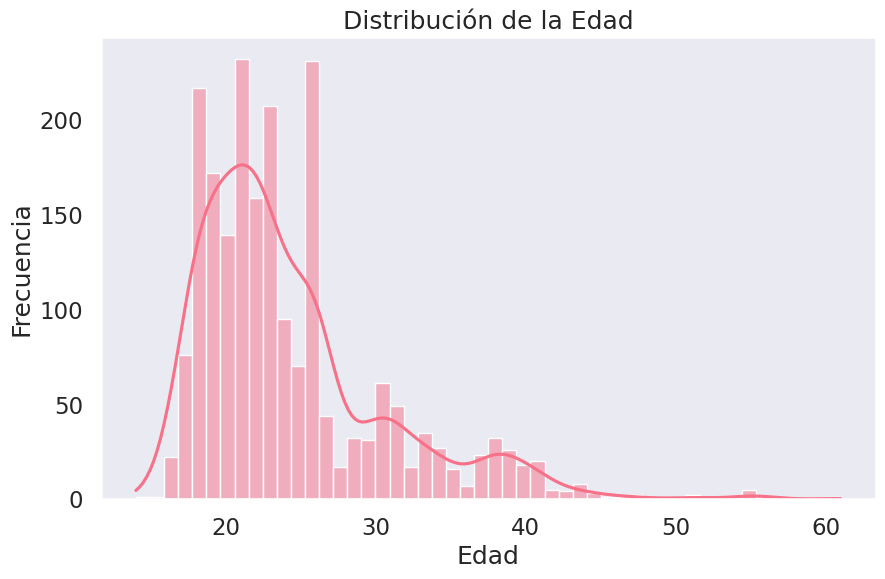

In [301]:
# Histograma de la característica 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df_Obesity['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### 2. Box Plot



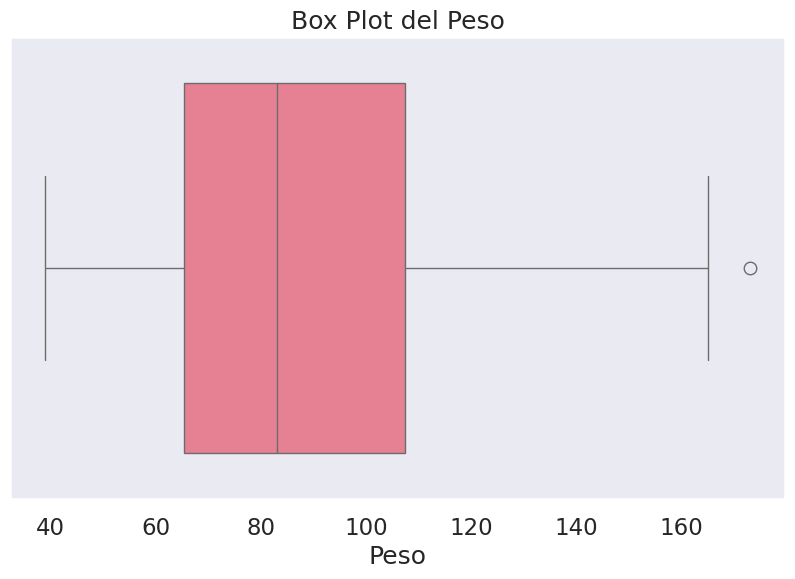

In [302]:
# Box Plot de la característica 'Weight'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_Obesity['Weight'])
plt.title('Box Plot del Peso')
plt.xlabel('Peso')
plt.show()


### 3. Pair Plot


<Figure size 1200x800 with 0 Axes>

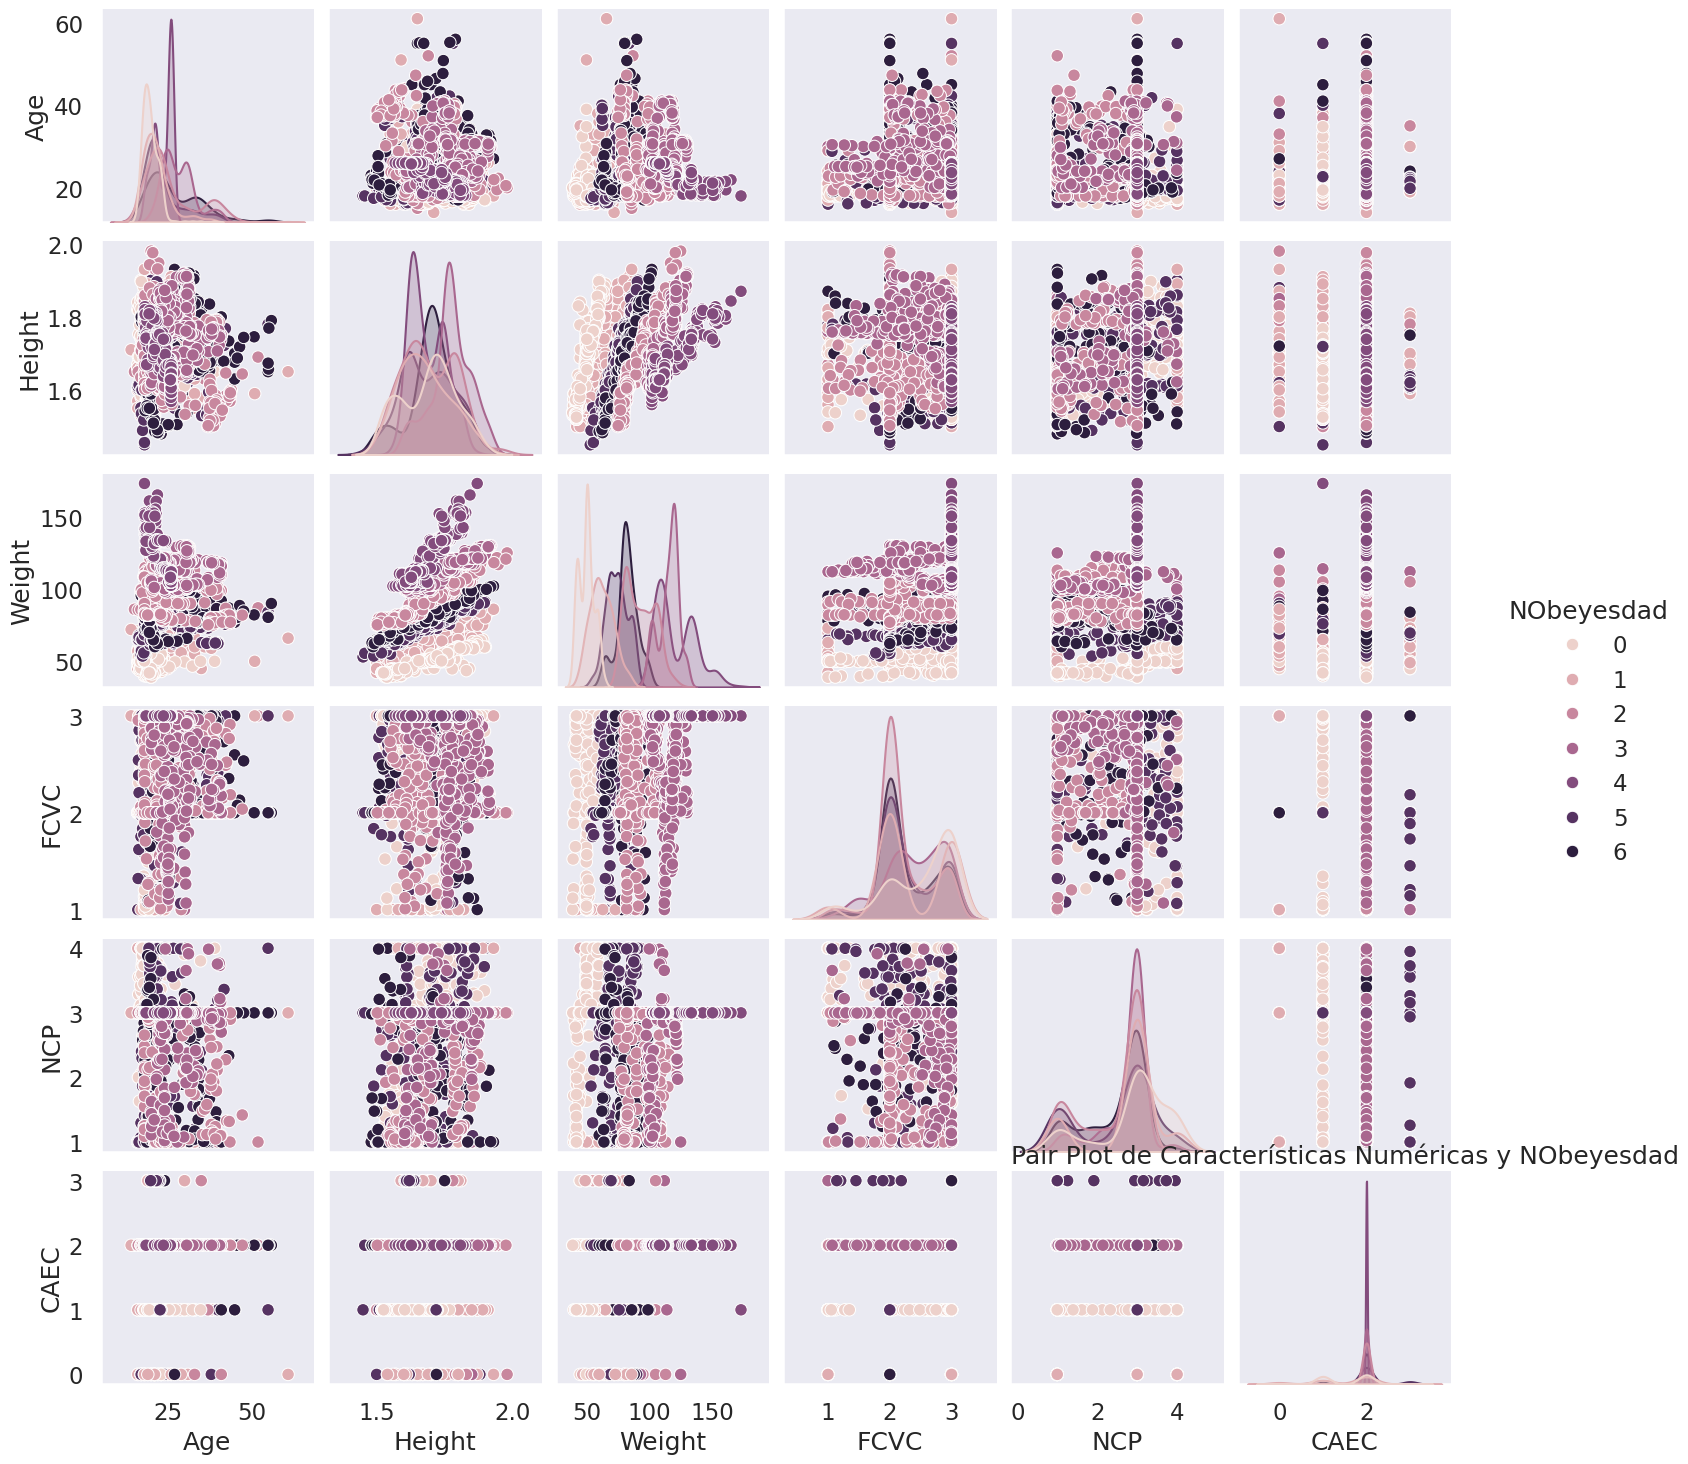

In [303]:
# Pair Plot de las características numéricas y la variable objetivo 'NObeyesdad'
plt.figure(figsize=(12, 8))
sns.pairplot(df_Obesity, vars=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC'], hue='NObeyesdad')
plt.title('Pair Plot de Características Numéricas y NObeyesdad')
plt.show()


**Explicación de los Gráficos**

* **Histograma:**
  Propósito:
  
  Visualizar la distribución de una característica.
  
  Interpretación:
  
  El histograma muestra la frecuencia de los valores de la característica 'Age'. La opción marginal='rug' añade una alfombra de puntos a lo largo del eje x para mostrar la distribución de los datos.

* **Box Plot:**

   Propósito:
   Visualizar la distribución y detectar outliers.
   
   Interpretación:
   El box plot muestra la distribución de la característica 'Weight', incluyendo la mediana, los cuartiles y los outliers.

* **Pair Plot:**
    Propósito:
     Visualizar las relaciones entre múltiples características y la variable objetivo.
     Interpretación:
     El pair plot muestra las relaciones entre las características numéricas y la variable objetivo 'NObeyesdad'. Cada subgráfico muestra la relación entre dos características, y el color indica la categoría de 'NObeyesdad'.


# Data Analysis



Para desarrollar un modelo de aprendizaje automático utilizando el dataset limpio y los insights obtenidos de la exploración de datos, relaizaremos los siguientes pasos

* **Preparación de los Datos:**
Asegurarnos de que el dataset esté limpio y listo para el modelado.

* **Selección de Características:**
 Seleccionar las características más relevantes para el modelo.

* **División del Dataset:**
Dividir el dataset en conjuntos de entrenamiento y prueba.

* **Selección del Modelo:**
 Elegir un modelo de aprendizaje automático adecuado.

* **Entrenamiento del Modelo:**
 Entrenar el modelo con el conjunto de entrenamiento.

* **Evaluación del Modelo:**
 Evaluar el modelo con el conjunto de prueba.

* **Ajuste del Modelo:**
 Ajustar el modelo según sea necesario para mejorar su rendimiento.


### Selección de Características  RandomForestClassifier



In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identificar y codificar columnas categóricas
categorical_features = df_Obesity.select_dtypes(include=['object']).columns
for column in categorical_features:
    df_Obesity[column] = df_Obesity[column].astype('category').cat.codes

# Seleccionar características y variable objetivo
X = df_Obesity.drop(columns=['NObeyesdad', 'NObeyesdad_encoded'])
y = df_Obesity['NObeyesdad_encoded']


### 3. División del Dataset



In [306]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Selección del Modelo

usaremos un modelo de Random Forest, que es robusto y adecuado para problemas de clasificación.

In [307]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(random_state=42)


### Entrenamiento del Modelo


In [308]:
# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluación del Modelo


In [309]:
from sklearn.metrics import classification_report, accuracy_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("************************************************************")
print("Reporte de clasificación:")
print("************************************************************")
print(classification_report(y_test, y_pred))
print("************************************************************")
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("************************************************************")

************************************************************
Reporte de clasificación:
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

************************************************************
Precisión del modelo: 0.9550827423167849
************************************************************


### Ajuste del Modelo



In [310]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print("************************************************************")
print("Reporte de clasificación del mejor modelo:")
print("************************************************************")
print(classification_report(y_test, y_pred_best))
print("************************************************************")
print("Precisión del mejor modelo:", accuracy_score(y_test, y_pred_best))
print("************************************************************")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
************************************************************
Reporte de clasificación del mejor modelo:
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.95      0.91        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

************************************************************
Precisión del mejor modelo: 0.9598108747044918
************************************************************


Para interpretar los resultados del reporte de clasificación, es importante entender las métricas de evaluación que se presentan: precisión (precision), recall (sensibilidad), f1-score y support. Aquí te explico cada una de estas métricas y cómo interpretar los resultados:

**Precisión (Precision):**

* Definición: La precisión es la proporción de verdaderos positivos (VP) entre todos los positivos predichos (VP + FP).
* Interpretación: Indica cuántos de los ejemplos predichos como positivos realmente son positivos.
    Fórmula:  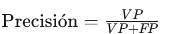


**Recall (Sensibilidad):**

* Definición:
 El recall es la proporción de verdaderos positivos (VP) entre todos los positivos reales (VP + FN).
* Interpretación: Indica cuántos de los ejemplos reales positivos fueron correctamente predichos como positivos.
    Fórmula: 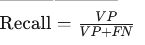




**F1-Score:**

* Definición:
El F1-Score es la media armónica de la precisión y el recall.
* Interpretación: Proporciona una medida equilibrada entre la precisión y el recall.
* Fórmula: 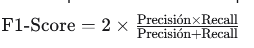




**Support:**

* Definición: El support es el número de ejemplos reales en cada clase.
* Interpretación: Indica cuántos ejemplos hay en cada clase en el conjunto de prueba.



**Interpretación de los Resultados**




1.	Clase 0:
* 	Precisión: 0.98 (98%)
* 	Recall: 0.96 (96%)
*	F1-Score: 0.97 (97%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 0, lo que indica que predice correctamente el 98% de los ejemplos positivos y el 96% de los ejemplos reales positivos.

2.	Clase 1:
*	Precisión: 0.89 (89%)
*	Recall: 0.90 (90%)
*	F1-Score: 0.90 (90%)
*	Support: 62 ejemplos

*	Interpretación: El modelo tiene una precisión y recall moderadamente altas para la clase 1, lo que indica que predice correctamente el 89% de los ejemplos positivos y el 90% de los ejemplos reales positivos.

3.	Clase 2:
*	Precisión: 0.99 (99%)
*	Recall: 0.97 (97%)
*	F1-Score: 0.98 (98%)
*	Support: 78 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 2, lo que indica que predice correctamente el 99% de los ejemplos positivos y el 97% de los ejemplos reales positivos.

4.	Clase 3:
*	Precisión: 0.97 (97%)
*	Recall: 0.98 (98%)
*	F1-Score: 0.97 (97%)
*	Support: 58 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 3, lo que indica que predice correctamente el 97% de los ejemplos positivos y el 98% de los ejemplos reales positivos.

5.	Clase 4:
*	Precisión: 1.00 (100%)
*	Recall: 1.00 (100%)
*	F1-Score: 1.00 (100%)
*	Support: 63 ejemplos

*	Interpretación: El modelo tiene una precisión y recall perfectas para la clase 4, lo que indica que predice correctamente todos los ejemplos positivos y todos los ejemplos reales positivos.

6.	Clase 5:
*	Precisión: 0.88 (88%)
*	Recall: 0.89 (89%)
*	F1-Score: 0.88 (88%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una precisión y recall moderadamente altas para la clase 5, lo que indica que predice correctamente el 88% de los ejemplos positivos y el 89% de los ejemplos reales positivos.

7.	Clase 6:
*	Precisión: 0.98 (98%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.97 (97%)
*	Support: 50 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 6, lo que indica que predice correctamente el 98% de los ejemplos positivos y el 96% de los ejemplos reales positivos.

**Métricas Globales**


*	**Accuracy: 0.96 (96%)**

*	Interpretación: El modelo tiene una precisión global del 96%, lo que indica que predice correctamente el 96% de todos los ejemplos.

*	**Macro Avg:**
*	Precisión: 0.95 (95%)
*	Recall: 0.95 (95%)
*	F1-Score: 0.95 (95%)

*	Interpretación: El promedio macro calcula la media de las métricas para cada clase sin considerar el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score promedio del 95%.

*	**Weighted Avg:**
*	Precisión: 0.96 (96%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.96 (96%)

*	Interpretación: El promedio ponderado calcula la media de las métricas para cada clase considerando el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score ponderado del 96%.

**Conclusión**

El modelo tiene un rendimiento generalmente alto en todas las clases, con una precisión global del 96%. Las clases 0, 2, 3, 4 y 6 tienen un rendimiento particularmente alto, mientras que las clases 1 y 5 tienen un rendimiento moderadamente alto. Estos resultados indican que el modelo es efectivo para predecir la variable objetivo NObeyesdad_encoded en el dataset de obesidad.



### Selección de Características K-Nearest Neighbors (KNN)



In [311]:
# Identificar y codificar columnas categóricas
categorical_features = df_Obesity.select_dtypes(include=['object']).columns
for column in categorical_features:
    df_Obesity[column] = df_Obesity[column].astype('category').cat.codes

# Seleccionar características y variable objetivo
X = df_Obesity.drop(columns=['NObeyesdad', 'NObeyesdad_encoded'])
y = df_Obesity['NObeyesdad_encoded']


### División del Dataset



In [222]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Selección del Modelo



In [223]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
model = KNeighborsClassifier(n_neighbors=5)


### Entrenamiento del Modelo

In [224]:
# Entrenar el modelo
model.fit(X_train, y_train)


KNeighborsClassifier()

### Evaluación del Modelo



In [225]:
from sklearn.metrics import classification_report, accuracy_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        56
           1       0.83      0.47      0.60        62
           2       0.89      0.97      0.93        78
           3       0.98      0.97      0.97        58
           4       0.97      1.00      0.98        63
           5       0.77      0.89      0.83        56
           6       0.92      0.90      0.91        50

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.87       423
weighted avg       0.88      0.88      0.87       423

Precisión del modelo: 0.8817966903073287


### Ajuste del Modelo

In [226]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print("Reporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred_best))
print("Precisión del mejor modelo:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        56
           1       0.92      0.56      0.70        62
           2       0.93      0.99      0.96        78
           3       1.00      0.98      0.99        58
           4       0.98      1.00      0.99        63
           5       0.82      0.96      0.89        56
           6       0.94      0.96      0.95        50

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.91       423
weighted avg       0.92      0.92      0.91       423

Precisión del mejor modelo: 0.9196217494089834


**Interpretación de los Resultados**

1.	Clase 0:
*	Precisión: 0.86 (86%)
*	Recall: 0.98 (98%)
*	F1-Score: 0.92 (92%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 0, lo que indica que predice correctamente el 86% de los ejemplos positivos y el 98% de los ejemplos reales positivos.

2.	Clase 1:
*	Precisión: 0.92 (92%)
*	Recall: 0.56 (56%)
*	F1-Score: 0.70 (70%)
*	Support: 62 ejemplos

*	Interpretación: El modelo tiene una precisión alta pero un recall bajo para la clase 1, lo que indica que predice correctamente el 92% de los ejemplos positivos, pero solo el 56% de los ejemplos reales positivos. Esto sugiere que el modelo puede estar fallando en identificar todos los ejemplos positivos reales.

3.	Clase 2:
*	Precisión: 0.93 (93%)
*	Recall: 0.99 (99%)
*	F1-Score: 0.96 (96%)
*	Support: 78 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 2, lo que indica que predice correctamente el 93% de los ejemplos positivos y el 99% de los ejemplos reales positivos.

4.	Clase 3:
*	Precisión: 1.00 (100%)
*	Recall: 0.98 (98%)
*	F1-Score: 0.99 (99%)
*	Support: 58 ejemplos

*	Interpretación: El modelo tiene una precisión y recall casi perfectas para la clase 3, lo que indica que predice correctamente todos los ejemplos positivos y el 98% de los ejemplos reales positivos.

5.	Clase 4:
*	Precisión: 0.98 (98%)
*	Recall: 1.00 (100%)
*	F1-Score: 0.99 (99%)
*	Support: 63 ejemplos

*	Interpretación: El modelo tiene una precisión y recall casi perfectas para la clase 4, lo que indica que predice correctamente el 98% de los ejemplos positivos y todos los ejemplos reales positivos.

6.	Clase 5:
*	Precisión: 0.82 (82%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.89 (89%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una precisión y recall moderadamente altas para la clase 5, lo que indica que predice correctamente el 82% de los ejemplos positivos y el 96% de los ejemplos reales positivos.

7.	Clase 6:
*	Precisión: 0.94 (94%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.95 (95%)
*	Support: 50 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 6, lo que indica que predice correctamente el 94% de los ejemplos positivos y el 96% de los ejemplos reales positivos.
Métricas Globales

*	Accuracy: 0.92 (92%)

*	Interpretación: El modelo tiene una precisión global del 92%, lo que indica que predice correctamente el 92% de todos los ejemplos.

*	Macro Avg:
*	Precisión: 0.92 (92%)
*	Recall: 0.92 (92%)
*	F1-Score: 0.91 (91%)

*	Interpretación: El promedio macro calcula la media de las métricas para cada clase sin considerar el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score promedio del 92% y 91%, respectivamente.

•	Weighted Avg:
*	Precisión: 0.92 (92%)
*	Recall: 0.92 (92%)
*	F1-Score: 0.91 (91%)

*	Interpretación: El promedio ponderado calcula la media de las métricas para cada clase considerando el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score ponderado del 92% y 91%, respectivamente.

**Conclusión**

El modelo de K-Nearest Neighbors tiene un rendimiento generalmente alto en todas las clases, con una precisión global del 92%. Las clases 2, 3, 4 y 6 tienen un rendimiento particularmente alto, mientras que la clase 1 tiene un recall bajo, lo que sugiere que el modelo puede estar fallando en identificar todos los ejemplos positivos reales en esta clase. Estos resultados indican que el modelo es efectivo para predecir la variable objetivo NObeyesdad_encoded en el dataset de obesidad, pero puede necesitar ajustes adicionales para mejorar el rendimiento en la clase 1.


### Selección de Características DecisionTreeClassifier

### Selección de Características



In [227]:
# Identificar y codificar columnas categóricas
categorical_features = df_Obesity.select_dtypes(include=['object']).columns
for column in categorical_features:
    df_Obesity[column] = df_Obesity[column].astype('category').cat.codes

# Seleccionar características y variable objetivo
X = df_Obesity.drop(columns=['NObeyesdad', 'NObeyesdad_encoded'])
y = df_Obesity['NObeyesdad_encoded']


### División del Dataset


In [228]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Selección del Modelo



In [230]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier(random_state=42)


### Entrenamiento del Modelo



In [231]:
# Entrenar el modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Evaluación del Modelo



In [232]:
from sklearn.metrics import classification_report, accuracy_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.84      0.87      0.86        62
           2       0.96      0.92      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.96      0.96      0.96        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423

Precisión del modelo: 0.933806146572104


### Ajuste del Modelo



In [233]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print("Reporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred_best))
print("Precisión del mejor modelo:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.95      0.90      0.93        62
           2       0.97      0.97      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      1.00      0.97        56
           6       1.00      0.94      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Precisión del mejor modelo: 0.9621749408983451


**Interpretación de los Resultados**

1.	Clase 0:
*	Precisión: 0.92 (92%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.94 (94%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 0, lo que indica que predice correctamente el 92% de los ejemplos positivos y el 96% de los ejemplos reales positivos.

2.	Clase 1:
*	Precisión: 0.84 (84%)
*	Recall: 0.87 (87%)
*	F1-Score: 0.86 (86%)
*	Support: 62 ejemplos

*	Interpretación: El modelo tiene una precisión y recall moderadamente altas para la clase 1, lo que indica que predice correctamente el 84% de los ejemplos positivos y el 87% de los ejemplos reales positivos.

3.	Clase 2:
*	Precisión: 0.96 (96%)
*	Recall: 0.92 (92%)
*	F1-Score: 0.94 (94%)
*	Support: 78 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 2, lo que indica que predice correctamente el 96% de los ejemplos positivos y el 92% de los ejemplos reales positivos.

4.	Clase 3:
*	Precisión: 0.95 (95%)
*	Recall: 0.95 (95%)
*	F1-Score: 0.95 (95%)
*	Support: 58 ejemplos

*	Interpretación: El modelo tiene una precisión y recall muy altas para la clase 3, lo que indica que predice correctamente el 95% de los ejemplos positivos y el 95% de los ejemplos reales positivos.

5.	Clase 4:
*	Precisión: 1.00 (100%)
*	Recall: 1.00 (100%)
*	F1-Score: 1.00 (100%)
*	Support: 63 ejemplos

*	Interpretación: El modelo tiene una precisión y recall perfectas para la clase 4, lo que indica que predice correctamente todos los ejemplos positivos y todos los ejemplos reales positivos.

6.	Clase 5:
*	Precisión: 0.91 (91%)
*	Recall: 0.88 (88%)
*	F1-Score: 0.89 (89%)
*	Support: 56 ejemplos

*	Interpretación: El modelo tiene una precisión y recall moderadamente altas para la clase 5, lo que indica que predice correctamente el 91% de los ejemplos positivos y el 88% de los ejemplos reales positivos.

7.	Clase 6:
*	Precisión: 0.96 (96%)
*	Recall: 0.96 (96%)
*	F1-Score: 0.96 (96%)
*	Support: 50 ejemplos

*	Interpretación: El modelo tiene una alta precisión y recall para la clase 6, lo que indica que predice correctamente el 96% de los ejemplos positivos y el 96% de los ejemplos reales positivos.

**Métricas Globales**

*	Accuracy: 0.93 (93%)

*	Interpretación: El modelo tiene una precisión global del 93%, lo que indica que predice correctamente el 93% de todos los ejemplos.

*	Macro Avg:
*	Precisión: 0.93 (93%)
*	Recall: 0.93 (93%)
*	F1-Score: 0.93 (93%)

* Interpretación: El promedio macro calcula la media de las métricas para cada clase sin considerar el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score promedio del 93%.

*	Weighted Avg:
*	Precisión: 0.93 (93%)
*	Recall: 0.93 (93%)
*	F1-Score: 0.93 (93%)

*	Interpretación: El promedio ponderado calcula la media de las métricas para cada clase considerando el desequilibrio de clases. El modelo tiene una precisión, recall y F1-Score ponderado del 93%.

**Conclusión**

El modelo de Árboles de Decisión tiene un rendimiento generalmente alto en todas las clases, con una precisión global del 93%. Las clases 3 y 4 tienen un rendimiento particularmente alto, mientras que las clases 1 y 5 tienen un rendimiento moderadamente alto. Estos resultados indican que el modelo es efectivo para predecir la variable objetivo NObeyesdad_encoded en el dataset de obesidad, pero puede necesitar ajustes adicionales para mejorar el rendimiento en las clases 1 y 5.
